In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import SpectralCoclustering

## Correlation matrix clustering for all 217 experiments

In [ ]:
def correlation_Co_clusters_plot(n_clusters, errors_matrix, columns, fig_size=(8,6), 
                                 cmap='RdBu', save=False, path_to_save_fig=None, 
                                 fig_name_1=None, fig_name_2=None, dpi=300, center=0):
    
    ''' rows = columns '''
    
    dataa = {columns[i]: errors_matrix[i] for i in range(len(errors_matrix))}
    df = pd.DataFrame(dataa, columns=columns)
    corrMatrix = df.corr()

    plt.figure(figsize=fig_size)
    sn.heatmap(corrMatrix, annot=False, cmap=cmap, center=center)
    plt.title(f'Original Correlation Matrix'+fig_name_1)
    if save:
        plt.savefig(path_to_save_fig+f'Original-Correlation-Matrix'+fig_name_1+'.png', 
                    bbox_inches='tight', dpi=dpi)

    # fit clustering model to data
    model = SpectralCoclustering(n_clusters=n_clusters, random_state=None)
    model.fit(corrMatrix)
    
    columns1 = np.array(columns)[np.argsort(model.column_labels_)]

    keys = []
    values = []
    for i in np.argsort(model.column_labels_):
        keys.append(columns[i])
        values.append(errors_matrix[i])
        
    Dataa = {keys[i]: values[i] for i in range(len(keys))}
    ddf = pd.DataFrame(Dataa, columns=columns1)

    plt.figure(figsize=fig_size)
    sn.heatmap(ddf.corr(), annot=False, cmap=cmap, center=0)
    plt.title(f'Co-Clustered Correlation Matrix'+fig_name_2)
    if save:
        plt.savefig(path_to_save_fig+'Clustered-Correlation-Matrix'+fig_name_2+'.png', 
                    bbox_inches='tight', dpi=dpi)
    return plt.show()

In [ ]:
path1 = 'Claculated test errors for correlation/Taxi/random_V_Q_errors.csv'
path2 = 'Claculated test errors for correlation/Taxi/KNN_test_errors_12.csv'
path3 = 'Claculated test errors for correlation/Beijing/random_V_Q_errors.csv'
path4 = 'Claculated test errors for correlation/Beijing/KNN_test_errors_Beijing.csv'
path5 = 'Claculated test errors for correlation/paper/test_errors_without_Frechet.csv'

A1 = pd.read_csv(path1, header=None).T[:-1]
A2 = pd.read_csv(path2, header=None).T[[0,1,3,4,5,6,7,8,9,10,11]].T
A = pd.concat([A1, A2], ignore_index=True)

A3 = pd.read_csv(path3, header=None).T[:-1]
A4 = pd.read_csv(path4, header=None).T[[0,1,3,4,5,6,7,8,9,10,11]].T
B = pd.concat([A3, A4], ignore_index=True)

C = pd.concat([A.T, B.T])

D = pd.read_csv(path5, header=None).T

data = pd.concat([C, D])
data.shape

(217, 19)

In [ ]:
distances1 = ['discrete_Frechet-KNN', 'Hausdorff-KNN', 'dtw-KNN', 'soft_dtw-KNN', 
             'fast-dtw-KNN', 'dtw_tslearn-KNN', 'd_Q_pi-KNN', 'sspd-KNN', 'erp-KNN', 
             'lcss-KNN', 'edr-KNN', 'lsh-KNN']

distances2 = ['discrete_Frechet-KNN', 'Hausdorff-KNN', 'dtw-KNN', 'sspd-KNN', 'erp-KNN', 
             'edr-KNN', 'lcss-KNN', 'fast-dtw-KNN', 'dtw_tslearn-KNN', 'd_Q_pi-KNN', 
             'soft_dtw-KNN', 'lsh-KNN']

columns = ['Frechet-KNN', 'discrete_Frechet-KNN', 'Hausdorff-KNN', 'dtw-KNN', 
           'soft_dtw-KNN', 'fast-dtw-KNN', 'd_Q_pi-KNN', 'sspd-KNN', 'lcss-KNN', 
           'edr-KNN', 'erp-KNN', 'lsh-KNN', 'LSVM-v_Q', 'GSVM-v_Q', 'PSVM-v_Q', 
           'DT-v_Q', 'RF-v_Q', 'KNN-v_Q', 'LR-v_Q', 'CNN-v_Q']

dists_joint = ['discrete_Frechet-KNN', 'Hausdorff-KNN', 'dtw_tslearn-KNN', 'soft_dtw-KNN', 
               'fast-dtw-KNN', 'd_Q_pi-KNN', 'sspd-KNN', 'lcss-KNN', 'edr-KNN', 'erp-KNN',
               'lsh-KNN']

classifiers = ['LSVM-v_Q', 'GSVM-v_Q', 'PSVM-v_Q', 'DT-v_Q', 'RF-v_Q', 'KNN-v_Q', 
               'LR-v_Q', 'CNN-v_Q']

In [ ]:
B1 = pd.read_csv(path2, header=None)
B2 = pd.read_csv(path4, header=None)
B3 = pd.read_csv(path5, header=None)

C1 = pd.read_csv(path1, header=None).T
C2 = pd.read_csv(path3, header=None).T

Dict1 = {distances1[i]: np.array(B1[i:i+1]) for i in range(len(distances1))}
Dict2 = {distances2[i]: np.array(B2[i:i+1]) for i in range(len(distances2))}
Dict3 = {dists_joint[i]: np.array(B3[i+1:i+2]) for i in range(len(dists_joint))}

Dict4 = {classifiers[i]: np.array(C1[i:i+1]) for i in range(len(classifiers))}
Dict5 = {classifiers[i]: np.array(C2[i:i+1]) for i in range(len(classifiers))}
Dict6 = {classifiers[i]: np.array(B3[i+11:i+12]) for i in range(len(classifiers))}

Dict = {}
for dist in dists_joint:
    Dict[dist] = np.concatenate((Dict1[dist], Dict2[dist], Dict3[dist]), 1)[0]

for classif in classifiers:
    Dict[classif] = np.concatenate((Dict4[classif], Dict5[classif], Dict6[classif]), 1)[0]

len(Dict)

19

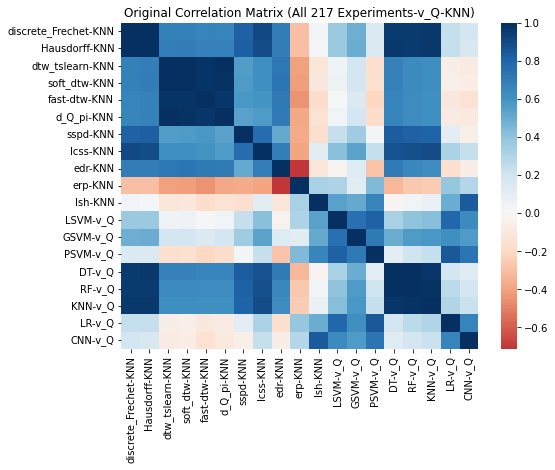

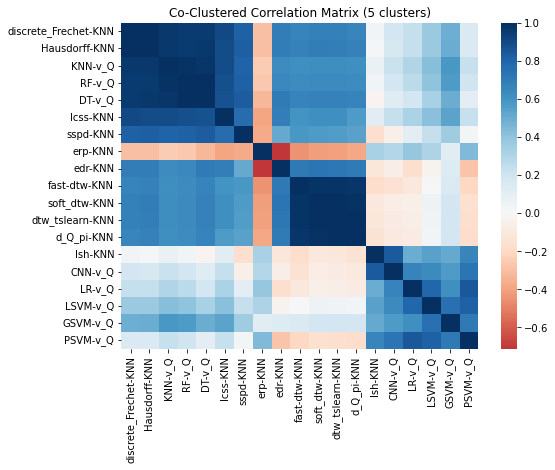

In [ ]:
n_clusters = 5

correlation_Co_clusters_plot(n_clusters=n_clusters, 
                     errors_matrix=np.array(list(Dict.values())), 
                     columns=list(Dict.keys()), fig_size=(8,6), cmap='RdBu', save=False, 
                     path_to_save_fig=None, 
                     fig_name_1=' (All 217 Experiments-v_Q-KNN)', 
                     fig_name_2=f' ({n_clusters} clusters)', 
                     dpi=300, center=0)